One-vs-All (OvA) Strategy
Accuracy: 76.12%
One-vs-One (OvO) Strategy
Accuracy: 92.2%


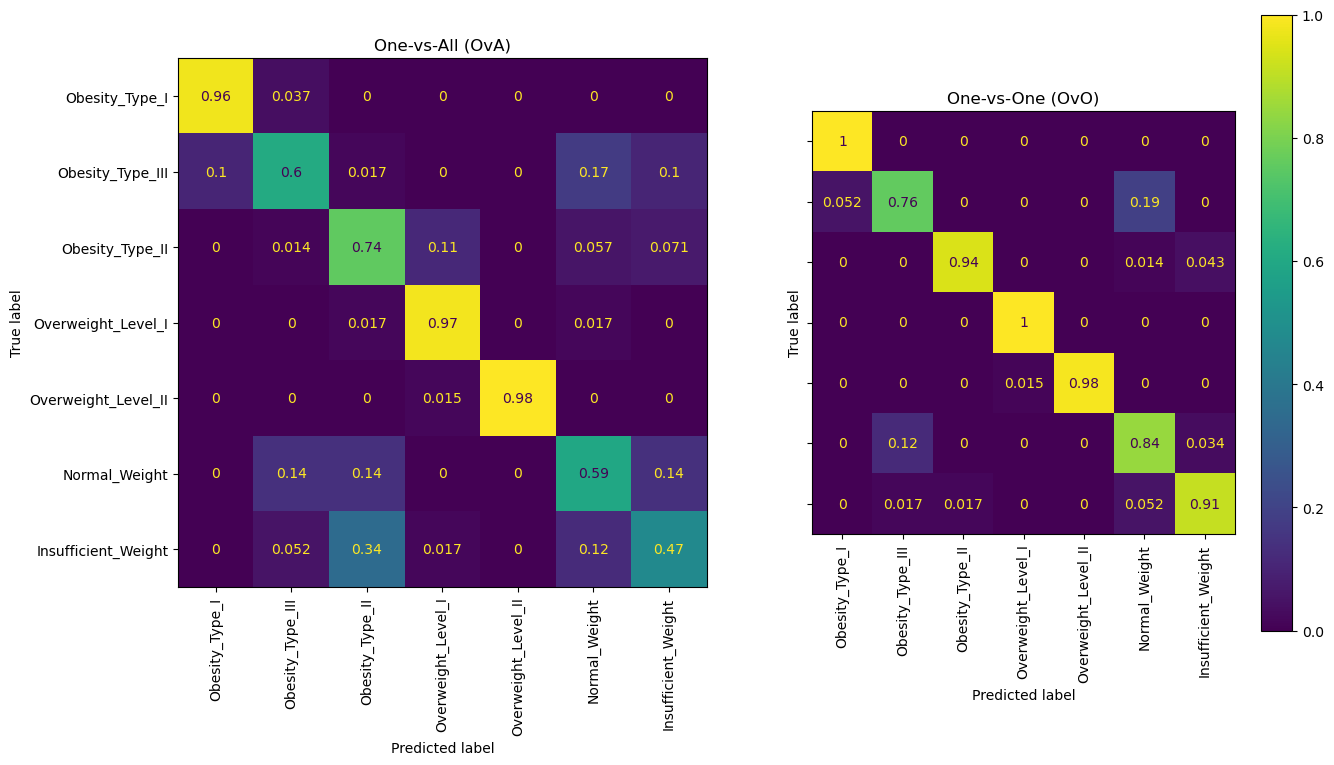

<Figure size 640x480 with 0 Axes>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
# write your function here and then execute this cell
data_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
def obesity_risk_pipeline(data_path, test_size=0.2):
    # Standardizing continuous numerical features
    data=pd.read_csv(data_path)
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)
    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    # Training logistic regression model using One-vs-All (default)
    model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
    model_ova.fit(X_train, y_train)
    # Predictions
    y_pred_ova = model_ova.predict(X_test)
    
    # Evaluation metrics for OvA
    print("One-vs-All (OvA) Strategy")
    print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")
    fig,axes=plt.subplots(1,2,sharey=True,figsize=(15,8))
    #fig.add_subplot(212)
    confmat=confusion_matrix(y_test, y_pred_ova,normalize='true')
    vals=data['NObeyesdad'].value_counts()
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confmat, display_labels=vals.index)
    cm_display.plot(ax=axes[0],xticks_rotation=90)
    cm_display.ax_.set_title('One-vs-All (OvA)')
    cm_display.im_.colorbar.remove()
    #axes[0].title()
    
    
    #plt.show()
    # Training logistic regression model using One-vs-One
    model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model_ovo.fit(X_train, y_train)
    # Predictions
    y_pred_ovo = model_ovo.predict(X_test)
    
    # Evaluation metrics for OvO
    print("One-vs-One (OvO) Strategy")
    print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

    #fig,axes=plt.subplots(1,2,sharex=True,sharey=True)
    #fig.add_subplot(212)
    confmat=confusion_matrix(y_test, y_pred_ovo,normalize='true')
    vals=data['NObeyesdad'].value_counts()
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confmat, display_labels=vals.index)
    cm_display.plot(ax=axes[1])
    plt.xticks(rotation=90)
    plt.title('One-vs-One (OvO)')
    plt.show()
    plt.tight_layout()

obesity_risk_pipeline(data_path, test_size=0.3)